# Sentiment analysis for distressed or not distressed in arabic 

First of all I will make my own synthetic data set to try on in arabic

In [1]:
import pandas as pd

# Data 
#create balanced data so no one label  overrules the others
data = [
    {"text": "أنا مخنوق ومش قادر أتنفس", "label": "Distressed"},
    {"text": "حاسس بضيق شديد ومش لاقي أي أمل", "label": "Distressed"},
    {"text": "حاسس إني ضايع ومحدش فاهمني", "label": "Distressed"},
    {"text": "مش عارف أعيش كده كتير", "label": "Distressed"},
    {"text": "مش قادر أواجه الحياة دي", "label": "Distressed"},
    {"text": "حاسس إني وحيد وبعيد عن كل حاجة", "label": "Distressed"},
    {"text": "مش عارف أتحكم في مشاعري", "label": "Distressed"},
    {"text": "حاسس إني محاصر ومش عارف أطلع", "label": "Distressed"},
    {"text": "مش عارف أعبر عن اللي جوايا", "label": "Distressed"},
    {"text": "حاسس إني تعبان نفسياً ومش قادر أكمل", "label": "Distressed"},
    {"text": "حاسس إني محطم من جوايا", "label": "Distressed"},
    {"text": "مش عارف أتحمل الوجع النفسي", "label": "Distressed"},
    {"text": "مش عارف أتخلص من الأفكار السلبية", "label": "Distressed"},
    {"text": "حاسس إني فاشل في كل حاجة", "label": "Distressed"},
    {"text": "مش عارف أتخطى اللي مريت بيه", "label": "Distressed"},
    {"text": "حاسس إني مش عارف أعيش", "label": "Distressed"},
    {"text": "مش عارف أسيطر على قلقي", "label": "Distressed"},
    {"text": "حاسس إني مش عارف أتنفس من الضيق", "label": "Distressed"},
    {"text": "مش عارف أتخلص من الإحباط", "label": "Distressed"},
    {"text": "أنا حاسس بضيق شديد", "label": "Distressed"},

    # Non-distressed examples
    {"text": "أنا كويس النهارده", "label": "Non-distressed"},
    {"text": "يوم عادي ومفيش حاجة تقلق", "label": "Non-distressed"},
    {"text": "اليوم كان هادي ومريح", "label": "Non-distressed"},
    {"text": "حاسس براحة كبيرة النهارده", "label": "Non-distressed"},
    {"text": "اليوم كان مليان أمل وفرح", "label": "Non-distressed"},
    {"text": "حاسس إني بخير وبعيش يوم جميل", "label": "Non-distressed"},
    {"text": "اليوم كان عادي ومش حاسس بأي ضغط", "label": "Non-distressed"},
    {"text": "حاسس إني مبسوط ومرتاح", "label": "Non-distressed"},
    {"text": "اليوم كان مليان طاقة إيجابية", "label": "Non-distressed"},
    {"text": "حاسس إني قوي وقادر أتخطى أي حاجة", "label": "Non-distressed"},
    {"text": "اليوم كان مليان تفاؤل", "label": "Non-distressed"},
    {"text": "حاسس إني مبسوط باللي حواليا", "label": "Non-distressed"},
    {"text": "اليوم كان مليان حب وسعادة", "label": "Non-distressed"},
    {"text": "حاسس إني مرتاح البال", "label": "Non-distressed"},
    {"text": "اليوم كان مليان نجاحات صغيرة", "label": "Non-distressed"},
    {"text": "حاسس إني متفائل بالمستقبل", "label": "Non-distressed"},
    {"text": "اليوم كان مليان لحظات جميلة", "label": "Non-distressed"},
    {"text": "حاسس إني مبسوط بالحياة", "label": "Non-distressed"},
    {"text": "اليوم كان مليان تفاصيل سعيدة", "label": "Non-distressed"},
    {"text": "حاسس إني مرتاح ومتفائل", "label": "Non-distressed"},
]

# Create DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


# Save to CSV 
df.to_csv("sentiments_data.csv", index=False, encoding="utf-8-sig")

                                   text           label
0              أنا مخنوق ومش قادر أتنفس      Distressed
1        حاسس بضيق شديد ومش لاقي أي أمل      Distressed
2            حاسس إني ضايع ومحدش فاهمني      Distressed
3                 مش عارف أعيش كده كتير      Distressed
4               مش قادر أواجه الحياة دي      Distressed
5        حاسس إني وحيد وبعيد عن كل حاجة      Distressed
6               مش عارف أتحكم في مشاعري      Distressed
7          حاسس إني محاصر ومش عارف أطلع      Distressed
8            مش عارف أعبر عن اللي جوايا      Distressed
9   حاسس إني تعبان نفسياً ومش قادر أكمل      Distressed
10               حاسس إني محطم من جوايا      Distressed
11           مش عارف أتحمل الوجع النفسي      Distressed
12     مش عارف أتخلص من الأفكار السلبية      Distressed
13             حاسس إني فاشل في كل حاجة      Distressed
14          مش عارف أتخطى اللي مريت بيه      Distressed
15                حاسس إني مش عارف أعيش      Distressed
16               مش عارف أسيطر على قلقي      Dis

In [2]:
pip install transformers datasets torch

Note: you may need to restart the kernel to use updated packages.


 ***Fine tuning BERT and using the Arabic BERT tokenizer***

In [3]:
from datasets import Dataset
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch

df = pd.read_csv("sentiments_data.csv")

# Map string labels to numerical labels
label_map = {"Distressed": 0, "Non-distressed": 1}
df["label"] = df["label"].map(label_map)

# Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",  # Pad to max_length
        truncation=True,       # Truncate to max_length
        max_length=128,        # Set a fixed max_length
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Split the dataset into train and test sets
tokenized_dataset = tokenized_dataset.train_test_split(test_size=0.2)

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

In [4]:
# Load the Tokenizer
# When using BERT, traditional NLP preprocessing steps like stop word removal, stemming, lemmatization, or lowercasing are not required. Here's why:
#
# - BERT Tokenizer: The BERT tokenizer is designed to process raw text directly. It uses subword tokenization (e.g., WordPiece),
#   which breaks words into smaller units, enabling it to handle out-of-vocabulary words and morphological variations effectively.
#
# - Stop Words: BERT is trained on large corpora and can inherently understand the importance (or lack thereof) of stop words in context.
#   Removing stop words may harm performance, as BERT relies on the full context of the sentence.
#
# - Other Preprocessing: Steps like stemming, lemmatization, or lowercasing are unnecessary. BERT's tokenizer and model are optimized
#   to work with raw text in its original form.
#
# Tokenize the Dataset
# Simply pass your raw text directly to the BERT tokenizer. It will handle the tokenization process, ensuring the text is in the
# optimal format for the model.

In [5]:
from transformers import AutoModelForSequenceClassification

# Load the model
model = AutoModelForSequenceClassification.from_pretrained(
    "asafaya/bert-base-arabic", num_labels=2
)

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
#make the code device agnostic
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [7]:
from transformers import TrainingArguments


training_args = TrainingArguments(
    output_dir="/kaggle/working/",  # Change to a valid directory
    report_to="none",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    fp16=False,  # Disable mixed precision
    disable_tqdm=False,
    push_to_hub=False,
    save_only_model=True,  # Save only the model
    max_grad_norm=1.0,
    seed=42
)
model.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [8]:
#functions used for metrics
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tqdm import tqdm

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average="weighted")
    recall = recall_score(labels, predictions, average="weighted")
    f1 = f1_score(labels, predictions, average="weighted")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

In [9]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.711158,0.250000,0.166667,0.250000,0.200000
2,No log,0.711242,0.500000,0.250000,0.500000,0.333333
3,No log,0.796648,0.500000,0.250000,0.500000,0.333333
4,No log,0.762529,0.500000,0.250000,0.500000,0.333333
5,No log,0.754515,0.500000,0.250000,0.500000,0.333333
6,No log,0.716232,0.500000,0.250000,0.500000,0.333333
7,No log,0.683722,0.500000,0.250000,0.500000,0.333333
8,No log,0.592048,0.625000,0.785714,0.625000,0.563636
9,No log,0.548127,0.625000,0.785714,0.625000,0.563636
10,0.528700,0.564641,0.500000,0.250000,0.500000,0.333333


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

TrainOutput(global_step=20, training_loss=0.42143229246139524, metrics={'train_runtime': 36.1047, 'train_samples_per_second': 17.726, 'train_steps_per_second': 0.554, 'total_flos': 42097768857600.0, 'train_loss': 0.42143229246139524, 'epoch': 20.0})

The model may be overfitting, but that is expected for how small the dataset is. Also, as this is a medical study, we need to focus on how good our model outputs the precision because precision measures the reliability of the model's positive predictions, and in medical contexts, false positives (incorrectly identifying a condition or distress) can lead to unnecessary treatments, increased healthcare costs, and psychological stress for patients. Therefore, ensuring high precision is critical to avoid these negative consequences and maintain trust in the model's predictions.


In [10]:
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Evaluation results: {'eval_loss': 0.42354875802993774, 'eval_accuracy': 0.75, 'eval_precision': 0.8333333333333333, 'eval_recall': 0.75, 'eval_f1': 0.7333333333333334, 'eval_runtime': 0.0987, 'eval_samples_per_second': 81.052, 'eval_steps_per_second': 10.132, 'epoch': 20.0}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


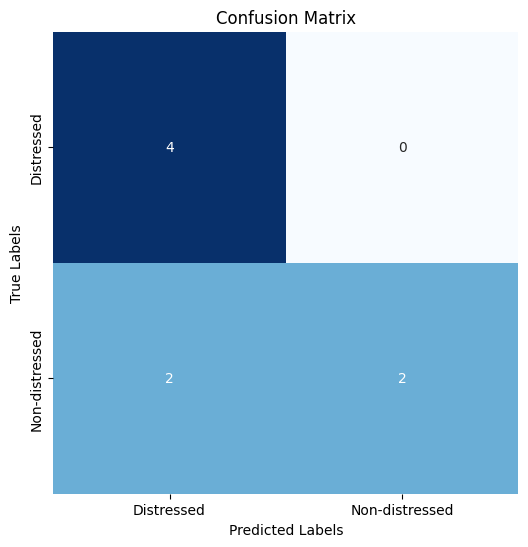

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on the evaluation dataset
predictions = trainer.predict(tokenized_dataset["test"])

# Extract predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=-1)
true_labels = predictions.label_ids

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Distressed", "Non-distressed"],
            yticklabels=["Distressed", "Non-distressed"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
#saving the model and the tokenizer
model.save_pretrained("./fine-tuned-bert-arabic")
tokenizer.save_pretrained("./fine-tuned-bert-arabic")

('./fine-tuned-bert-arabic/tokenizer_config.json',
 './fine-tuned-bert-arabic/special_tokens_map.json',
 './fine-tuned-bert-arabic/vocab.txt',
 './fine-tuned-bert-arabic/added_tokens.json',
 './fine-tuned-bert-arabic/tokenizer.json')

In [13]:
from transformers import pipeline

# Load the fine-tuned model
predict_emotion = pipeline(
    "text-classification",
    model="./fine-tuned-bert-arabic",
    tokenizer=tokenizer,
)

# Define the reverse label mapping
reverse_label_map = {0: "Distressed", 1: "Non-distressed"}

# Test on a new sentence
result = predict_emotion("أنا حاسس بضيق شديد")

# Unmap the numerical label to the string label
predicted_label = reverse_label_map[int(result[0]["label"].split("_")[1])]
confidence = result[0]["score"]

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.4f}")


Device set to use cuda:0


Predicted Label: Distressed
Confidence: 0.8317


In [14]:
# Test sentences
test_sentences = [
    "أشعر بالسعادة والراحة اليوم",  # I feel happy and comfortable today
    "مش عارف أنام من التفكير في المشاكل",  # I can't sleep because of thinking about problems
    "اليوم كان مليان إنجازات وأشعر بالفخر",  # Today was full of achievements, and I feel proud
    "حاسس إني مش عارف أتنفس من الضغط النفسي",  # I feel like I can't breathe from the psychological pressure
    "يوم عادي جدًا، مفيش حاجة جديدة",  # A very ordinary day, nothing new
    "أنا حاسس بضيق شديد"
]

for sentence in test_sentences:
    result = predict_emotion(sentence)
    predicted_label = reverse_label_map[int(result[0]["label"].split("_")[1])]
    confidence = result[0]["score"]
    print(f"Text: {sentence}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Confidence: {confidence:.4f}")
    print()

Text: أشعر بالسعادة والراحة اليوم
Predicted Label: Non-distressed
Confidence: 0.7179

Text: مش عارف أنام من التفكير في المشاكل
Predicted Label: Distressed
Confidence: 0.8828

Text: اليوم كان مليان إنجازات وأشعر بالفخر
Predicted Label: Non-distressed
Confidence: 0.7962

Text: حاسس إني مش عارف أتنفس من الضغط النفسي
Predicted Label: Distressed
Confidence: 0.8743

Text: يوم عادي جدًا، مفيش حاجة جديدة
Predicted Label: Non-distressed
Confidence: 0.7112

Text: أنا حاسس بضيق شديد
Predicted Label: Distressed
Confidence: 0.8317



you can uncomment and use this code to input an arabic sentence

why not do it simply as we don't have that many data points so let's run a quick xgboost algortihm 

 ***XGBOOST approach***

In [15]:
# # Load the fine-tuned model and tokenizer
# from transformers import pipeline

# model_path = "./fine_tuned_arabic_bert"
# classifier = pipeline("text-classification", model=model_path, tokenizer=model_path)

# # Define the reverse label map (if you have one)
# reverse_label_map = {0: "Distressed", 1: "Non-distressed"}  # Adjust based on your label mapping

# # Function to classify user input
# def classify_text():
#     while True:
#         # Take user input
#         user_input = input("Enter a sentence in Arabic (or type 'exit' to quit): ")
        
#         # Exit condition
#         if user_input.lower() == "exit":
#             print("Exiting...")
#             break
        
#         # Classify the input
#         result = classifier(user_input)
#         predicted_label = reverse_label_map[int(result[0]["label"].split("_")[1])]
#         confidence = result[0]["score"]
        
#         # Print results
#         print(f"Text: {user_input}")
#         print(f"Predicted Label: {predicted_label}")
#         print(f"Confidence: {confidence:.4f}")
#         print()

# # Run the classifier
# classify_text()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("sentiments_data.csv")

# Map string labels to numerical labels
label_map = {"Distressed": 0, "Non-distressed": 1}
df["label"] = df["label"].map(label_map)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = xgb_model.predict(X_test_tfidf)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6250
Precision: 0.8125
Recall: 0.6250
F1 Score: 0.6071


In [17]:
# Test sentences
test_sentences = [
    "أشعر بالسعادة والراحة اليوم",  # I feel happy and comfortable today
    "مش عارف أنام من التفكير في المشاكل",  # I can't sleep because of thinking about problems
    "اليوم كان مليان إنجازات وأشعر بالفخر",  # Today was full of achievements, and I feel proud
    "حاسس إني مش عارف أتنفس من الضغط النفسي",  # I feel like I can't breathe from the psychological pressure
    "يوم عادي جدًا، مفيش حاجة جديدة",  # A very ordinary day, nothing new
]

#reverse label mapping so we output the actual label not 1 or 0 
reverse_label_map = {0: "Distressed", 1: "Non-distressed"}

# Transform the test sentences into TF-IDF features
test_sentences_tfidf = vectorizer.transform(test_sentences)

# Predict
predictions = xgb_model.predict(test_sentences_tfidf)
probabilities = xgb_model.predict_proba(test_sentences_tfidf)

#results
for sentence, prediction, prob in zip(test_sentences, predictions, probabilities):
    predicted_label = reverse_label_map[prediction]
    confidence = prob[prediction]  # Confidence for the predicted class
    print(f"Text: {sentence}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Confidence: {confidence:.4f}")
    print()

Text: أشعر بالسعادة والراحة اليوم
Predicted Label: Non-distressed
Confidence: 0.7501

Text: مش عارف أنام من التفكير في المشاكل
Predicted Label: Distressed
Confidence: 0.8859

Text: اليوم كان مليان إنجازات وأشعر بالفخر
Predicted Label: Non-distressed
Confidence: 0.8788

Text: حاسس إني مش عارف أتنفس من الضغط النفسي
Predicted Label: Distressed
Confidence: 0.8876

Text: يوم عادي جدًا، مفيش حاجة جديدة
Predicted Label: Non-distressed
Confidence: 0.7501



# ***Sentiment analysis in english for multiple mental health issues***

In [18]:
import pandas as pd
df=pd.read_csv("/kaggle/input/sentiment-analysis-for-mental-health/Combined Data.csv")
df.info()
df['status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [19]:
#the data is unbalanced so I will do some things to help wiith that
#balancing the wieghts
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Example labels
labels = ['Normal', 'Depression', 'Suicidal', 'Anxiety', 'Bipolar', 'Stress', 'Personality disorder']
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)

# Convert to dictionary format (for scikit-learn or TensorFlow)
class_weights_dict = dict(zip(np.unique(labels), class_weights))
print(class_weights_dict)


#use this when training in pytorch
# weights = torch.tensor(list(class_weights_dict.values()), dtype=torch.float32)
# criterion = nn.CrossEntropyLoss(weight=weights)

{'Anxiety': 1.0, 'Bipolar': 1.0, 'Depression': 1.0, 'Normal': 1.0, 'Personality disorder': 1.0, 'Stress': 1.0, 'Suicidal': 1.0}


In [20]:
pip install transformers datasets torch

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset

# Drop rows with missing text
df = df.dropna(subset=['statement'])

# Map labels to integers
label_map = {
    'Normal': 0,
    'Depression': 1,
    'Suicidal': 2,
    'Anxiety': 3,
    'Bipolar': 4,
    'Stress': 5,
    'Personality disorder': 6
}
df['label'] = df['status'].map(label_map)

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
def tokenize_data(df):
    return tokenizer(
        df['statement'].tolist(),
        padding=True,
        truncation=True,
        max_length=128,  # Adjust based on your text length
        return_tensors='pt'
    )

train_encodings = tokenize_data(train_df)
val_encodings = tokenize_data(val_df)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [23]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = SentimentDataset(train_encodings, train_df['label'].tolist())
val_dataset = SentimentDataset(val_encodings, val_df['label'].tolist())

In [24]:
from transformers import BertForSequenceClassification

# Load the BERT model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(label_map)  # Number of classes
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from transformers import Trainer, TrainingArguments
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
from torch import nn

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    eval_strategy="epoch",           # Evaluate every epoch
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Weight decay
    save_strategy="epoch",           # Save model every epoch
    logging_dir='./logs',            # Directory for logs
    logging_steps=10,                # Log every 10 steps
    report_to="none",                # Disable wandb and other logging integrations
    disable_tqdm=False,              # Ensure tqdm progress bars are enabled (default)
    fp16=True,                       # Enable mixed precision training (optional)
)

# Compute class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

# Custom Trainer with weighted loss
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        # Get the device of the model
        if isinstance(model, torch.nn.DataParallel):
            device = model.module.device  # Access the underlying model's device
        else:
            device = model.device  # Single-GPU case

        # Move inputs to the correct device
        inputs = {k: v.to(device) for k, v in inputs.items()}
        
        # Move class weights to the correct device
        class_weights_device = class_weights.to(device)
        
        # Get labels and outputs
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get('logits')
        
        # Compute loss with class weights
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_device)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        
        return (loss, outputs) if return_outputs else loss

# Initialize the Trainer
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train the model with tqdm progress bars
trainer.train()

<ipython-input-23-f60c98c31dec>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.514100,0.520808
2,0.373200,0.471843
3,0.294800,0.488492


<ipython-input-23-f60c98c31dec>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
<ipython-input-23-f60c98c31dec>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were sc

TrainOutput(global_step=3951, training_loss=0.4855160803560727, metrics={'train_runtime': 2097.9449, 'train_samples_per_second': 60.265, 'train_steps_per_second': 1.883, 'total_flos': 8316787586457600.0, 'train_loss': 0.4855160803560727, 'epoch': 3.0})

In [26]:
# Evaluate the model
results = trainer.evaluate()
print(results)

<ipython-input-23-f60c98c31dec>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 0.48849180340766907, 'eval_runtime': 54.7218, 'eval_samples_per_second': 192.556, 'eval_steps_per_second': 6.031, 'epoch': 3.0}


In [27]:
model.save_pretrained('./fine-tuned-bert')
tokenizer.save_pretrained('./fine-tuned-bert')

('./fine-tuned-bert/tokenizer_config.json',
 './fine-tuned-bert/special_tokens_map.json',
 './fine-tuned-bert/vocab.txt',
 './fine-tuned-bert/added_tokens.json')

***now let's test our model's performance***

In [28]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained('./fine-tuned-bert')
tokenizer = BertTokenizer.from_pretrained('./fine-tuned-bert')

# Set the model to evaluation mode
model.eval()

# Synthetic test data (replace with your actual test data if available)
test_data = {
    "statement": [
        "I feel happy and content with my life.",  # Normal
        "I can't stop crying; everything feels hopeless.",  # Depression
        "I don't want to live anymore; it's too painful.",  # Suicidal
        "I feel anxious and can't focus on anything.",  # Anxiety
        "My mood swings are extreme; one moment I'm happy, the next I'm angry.",  # Bipolar
        "I'm under so much pressure; I can't handle it.",  # Stress
        "I feel like I don't fit in with anyone; I'm always misunderstood.",  # Personality disorder
        "I feel great and have no worries.",  # Normal
        "I feel like I'm losing control of my thoughts.",  # Anxiety
        "I feel so low and empty inside.",  # Depression
    ],
    "status": [
        "Normal",
        "Depression",
        "Suicidal",
        "Anxiety",
        "Bipolar",
        "Stress",
        "Personality disorder",
        "Normal",
        "Anxiety",
        "Depression",
    ]
}

# Convert test data to DataFrame
test_df = pd.DataFrame(test_data)

# Map labels to integers
label_map = {
    'Normal': 0,
    'Depression': 1,
    'Suicidal': 2,
    'Anxiety': 3,
    'Bipolar': 4,
    'Stress': 5,
    'Personality disorder': 6
}
test_df['label'] = test_df['status'].map(label_map)

# Tokenize the test data
test_encodings = tokenizer(
    test_df['statement'].tolist(),
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors='pt'
)

# Predict labels
with torch.no_grad():
    outputs = model(**test_encodings)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1).numpy()

# Map predicted labels back to class names
test_df['predicted_status'] = [list(label_map.keys())[list(label_map.values()).index(pred)] for pred in predictions]

# Display the results
print("Test Data Predictions:")
print(test_df[['statement', 'status', 'predicted_status']])

# Evaluate performance
print("\nClassification Report:")
print(classification_report(test_df['status'], test_df['predicted_status'], target_names=label_map.keys()))

print("\nConfusion Matrix:")
print(confusion_matrix(test_df['status'], test_df['predicted_status'], labels=list(label_map.keys())))

print("\nAccuracy Score:")
print(accuracy_score(test_df['status'], test_df['predicted_status']))

Test Data Predictions:
                                           statement                status  \
0             I feel happy and content with my life.                Normal   
1    I can't stop crying; everything feels hopeless.            Depression   
2    I don't want to live anymore; it's too painful.              Suicidal   
3        I feel anxious and can't focus on anything.               Anxiety   
4  My mood swings are extreme; one moment I'm hap...               Bipolar   
5     I'm under so much pressure; I can't handle it.                Stress   
6  I feel like I don't fit in with anyone; I'm al...  Personality disorder   
7                  I feel great and have no worries.                Normal   
8     I feel like I'm losing control of my thoughts.               Anxiety   
9                    I feel so low and empty inside.            Depression   

  predicted_status  
0           Normal  
1       Depression  
2       Depression  
3          Anxiety  
4           N

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
